## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [3]:
!pip install pandas_datareader

In [4]:
from pandas_datareader import data as pdr 
import matplotlib.pyplot as plt 

In [5]:
start = "2017-01-01" 
end = "2018-12-31" 
symbols = ["AAPL"] 
   
data = pdr.get_data_yahoo(symbols, start, end) 
   
data['Open']['AAPL']

Date
2017-01-03    28.950001
2017-01-04    28.962500
2017-01-05    28.980000
2017-01-06    29.195000
2017-01-09    29.487499
                ...    
2018-12-24    37.037498
2018-12-26    37.075001
2018-12-27    38.959999
2018-12-28    39.375000
2018-12-31    39.632500
Name: AAPL, Length: 502, dtype: float64

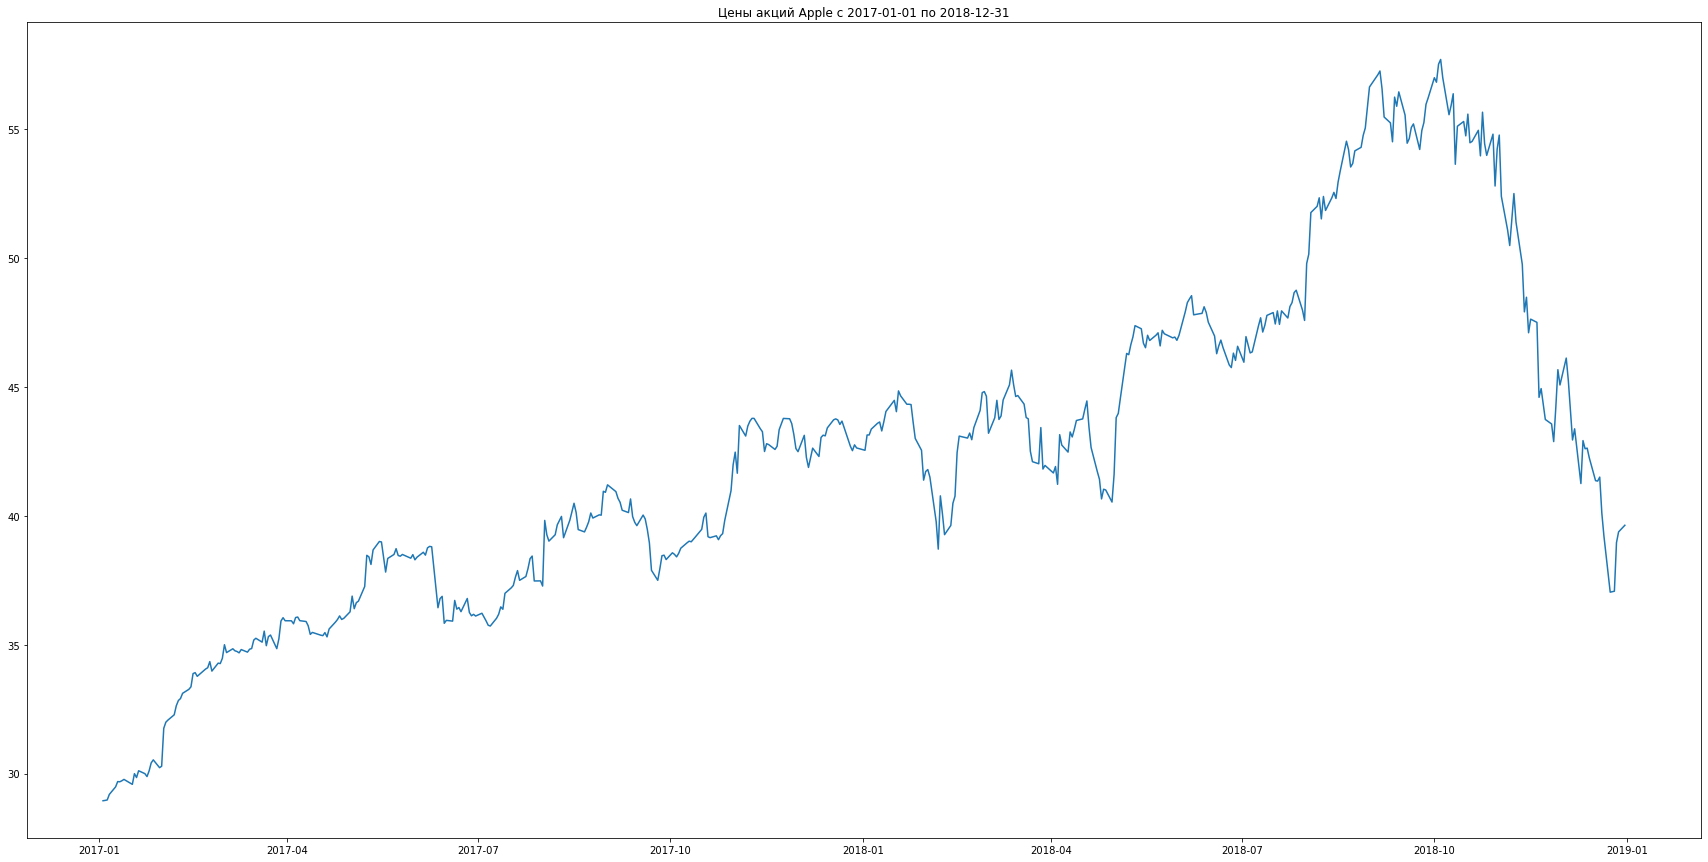

In [6]:
plt.figure(figsize = (30, 15)) 
plt.title(f'Цены акций Apple с {start} по {end}') 
plt.plot(data['Open']['AAPL']) 
plt.show()

2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

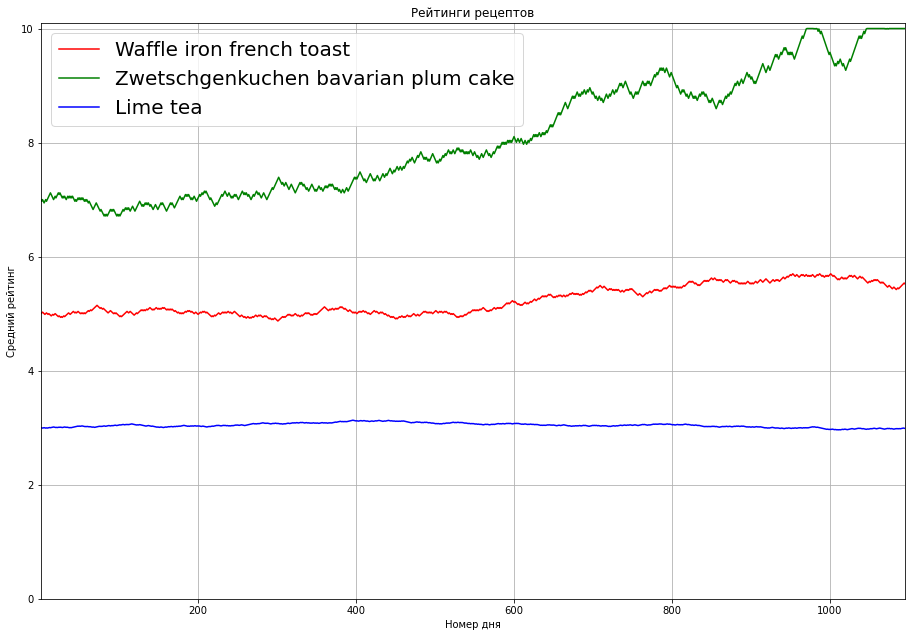

In [6]:
arr = np.load(r"D:\Python_projects\data_for_tobd\Data_PS_5\average_ratings.npy")
x = np.arange(1, 1096)
fig = plt.figure(figsize = (15, 10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
line1, = ax.plot(x, arr[0], 'r', label = 'Waffle iron french toast')
line2, = ax.plot(x, arr[1], 'g', label = 'Zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(x, arr[2], 'b', label = 'Lime tea')

ax.set_xlabel("Номер дня")
ax.set_ylabel("Средний рейтинг")

ax.legend(handles=[line1, line2, line3], fontsize = 20)
ax.set_title('Рейтинги рецептов')

plt.grid()

plt.ylim(0, 10.1)
plt.xlim(1, 1095)

plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


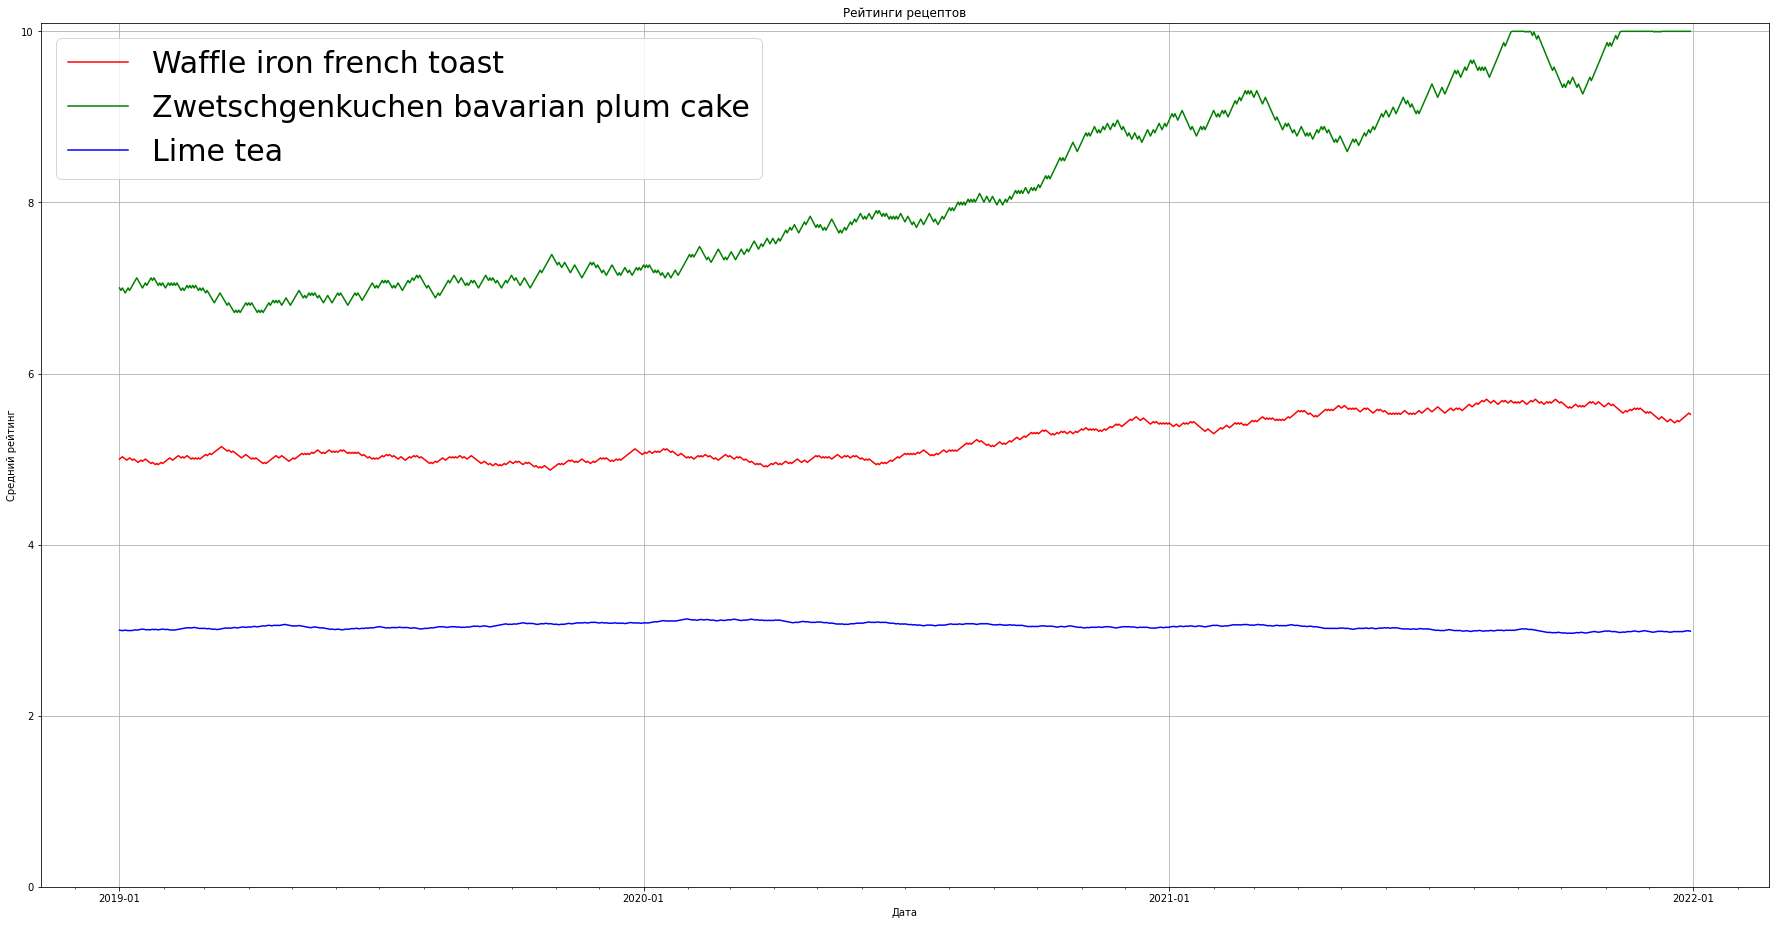

In [8]:
import matplotlib.ticker as ticker

times = pd.date_range(start="1/1/2019", end="30/12/2021").to_numpy()


fig = plt.figure(figsize = (30, 15))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
line1, = ax.plot(times, arr[0], 'r', label = 'Waffle iron french toast')
line2, = ax.plot(times, arr[1], 'g', label = 'Zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(times, arr[2], 'b', label = 'Lime tea')


ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())

ax.set_xlabel("Дата")
ax.set_ylabel("Средний рейтинг")

ax.legend(fontsize = 30)
ax.set_title('Рейтинги рецептов')

plt.grid()

plt.ylim(0, 10.1)

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

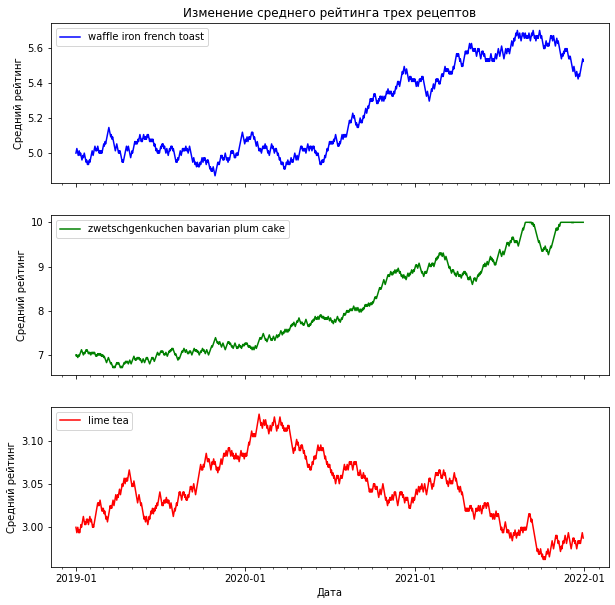

In [11]:
name = ['Waffle iron french toast', 'Zwetschgenkuchen bavarian plum cake', 'Lime tea']
color = ['r', 'g', 'b']
clrs = {0: ['waffle iron french toast','b'],
1: ['zwetschgenkuchen bavarian plum cake', 'g'],
2: ['lime tea', 'r']}
fig, axes = plt.subplots(nrows = 3, ncols= 1, sharex = 'col', figsize = (10,10))
for i in range(len(axes)):
    axes[i].plot(times, arr[i], clrs[i][1], label = clrs[i][0])
    axes[2].set_xlabel('Дата')
    axes[i].set_ylabel('Средний рейтинг')
    axes[i].legend(fontsize = 10, loc = 'upper left')
    axes[i].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13)))
    axes[i].xaxis.set_minor_locator(mdates.MonthLocator())
    axes[0].set_title('Изменение среднего рейтинга трех рецептов');

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


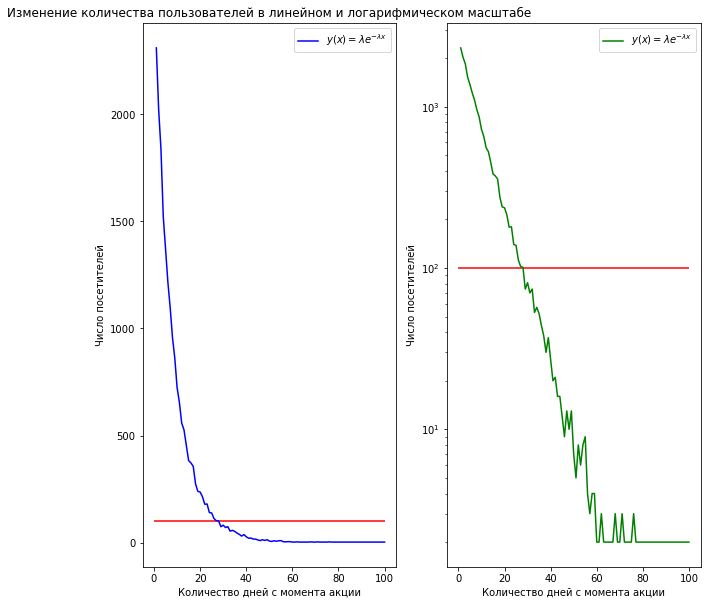

In [11]:
arr = np.load(r"D:\Python_projects\data_for_tobd\Data_PS_5\visitors.npy")
x = np.arange(1, 101)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,10))
axes[0].set_title("Изменение количества пользователей в линейном и логарифмическом масштабе")


axes[0].plot(x, arr, 'b', label = "$y(x) = \lambda e^{-\lambda x}$")
axes[1].plot(x, arr, 'g', label = "$y(x) = \lambda e^{-\lambda x}$")


axes[0].hlines(100, 0, 100, 'r')
axes[1].hlines(100, 0, 100, 'r')

axes[0].set_xlabel('Количество дней с момента акции')
axes[0].set_ylabel('Число посетителей')

axes[1].set_xlabel('Количество дней с момента акции')
axes[1].set_ylabel('Число посетителей')

axes[0].legend()
axes[1].legend()
plt.yscale('log')
plt.show()

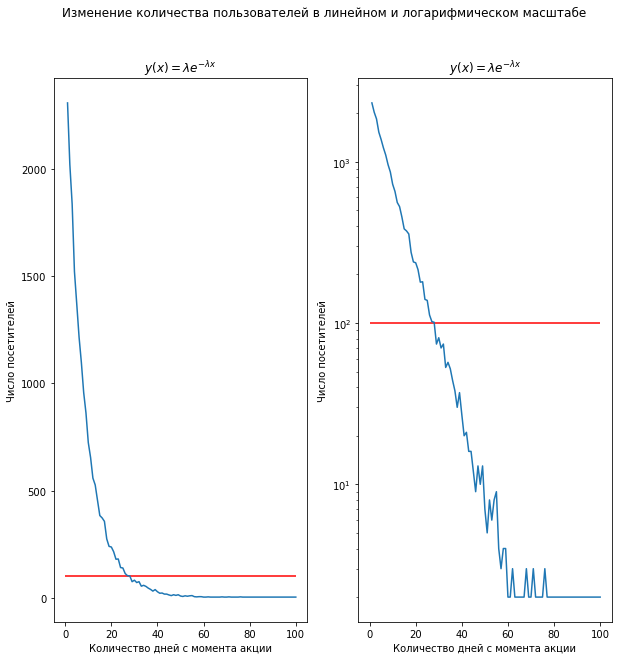

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10))
ax1.plot(np.arange(1, 101), arr)
ax2.plot(np.arange(1, 101), arr)
plt.yscale("log")
axes = [ax1, ax2]
for i in range(len(axes)):
    axes[i].set_title('$y(x) = \lambda e^{-\lambda x}$')
    axes[i].set_xlabel('Количество дней с момента акции')
    axes[i].set_ylabel('Число посетителей')
axes[0].hlines(100, 0, 100, 'r')
axes[1].hlines(100, 0, 100, 'r')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе');

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [26]:
import os
os.chdir("D:\Python_projects\data_for_tobd\data_4")
##################################################
reviews =  pd.read_csv("reviews_sample.csv", delimiter=",", index_col="Unnamed: 0")
recipes =  pd.read_csv("recipes_sample.csv", delimiter=",")

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [14]:
def f(s):
    if int(s) < 5:
        return "Short"
    elif int(s) <= 50:
        return "Medium"
    else:
        return "Long"
res = recipes['minutes'].apply(f)  
recipes['charac'] = res
df1 = recipes.groupby('charac')['n_steps'].agg(['mean'])
df2 = recipes.groupby('charac')['id'].agg(['count'])
df2

,count
charac,
Long,10422
Medium,18903
Short,675


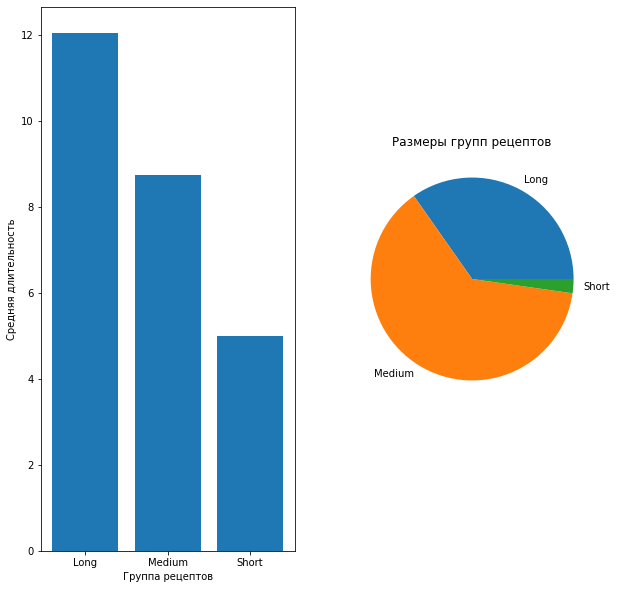

In [15]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 10))
ax1.bar(list(df1.index), df1['mean'])
ax1.set_ylabel("Средняя длительность")
ax1.set_xlabel("Группа рецептов")


ax2.pie(df2['count'], labels=['Long', 'Medium', 'Short'])
ax2.set_title("Размеры групп рецептов")

plt.show()

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [27]:
reviews = reviews['2008-01-01' < reviews['date']]
reviews = reviews['2009-12-31' > reviews['date']]

def f(s):
    return s[0:4]

reviews['date'] = reviews['date'].apply(f)
r_2008 = reviews[reviews['date'] == '2008']
r_2008

,user_id,recipe_id,date,rating,review
187037,400708,252013,2008,4,"Very nice breakfast HH, easy to make and yummy..."
312179,95810,129396,2008,5,Excellent soup! The tomato flavor is just gre...
1023302,308434,11252,2008,5,Oh Bergy! These wonderful little cakes are aw...
264646,151754,285773,2008,0,"This was a very moist cornbread, even two days..."
126930,379985,150499,2008,5,I really liked this recipe. It's perfect to ma...
...,...,...,...,...,...
1000833,125772,246370,2008,5,Very good I put mine in the crock pot. We love...
1332,424680,99672,2008,5,Here's a nice way to put everything in the sam...
532061,335737,36548,2008,5,If only there were more stars to give! Normall...
344676,724631,314698,2008,5,"5 Stars, The Hunter said the mushrooms and sau..."


In [28]:
r_2009 = reviews[reviews['date'] == '2009']
r_2009

,user_id,recipe_id,date,rating,review
747740,830551,49200,2009,5,These were delicious! I grated a little bit of...
177896,969481,38249,2009,4,"I did not make the meatloaf, but took a review..."
612209,479902,105102,2009,5,I omitted the red pepper flakes because I have...
873566,577826,280223,2009,5,This was simply WONDERFUL! I didn't have any s...
868551,1314836,53503,2009,5,very good.. love it..
...,...,...,...,...,...
775013,1207345,368208,2009,2,"I found this to be a good dish,but not great.I..."
158614,107890,8701,2009,5,These ribs were great! The sauce was perfect-...
712825,518572,51209,2009,5,Count my family in as fans of this recipe. I ...
698638,1186693,394518,2009,0,I must have done something wrong! Mine were v...


Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

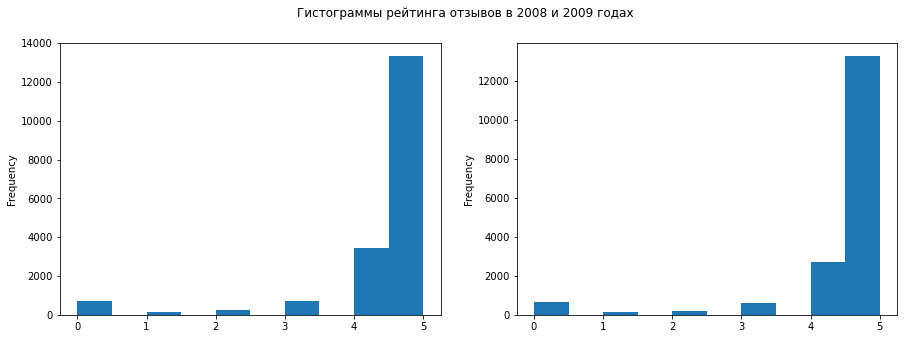

In [30]:
fig, (ax1, ax2) = plt.subplots(figsize = (15, 5), ncols=2, nrows=1)
ax1 = r_2008['rating'].plot.hist(ax = ax1)
ax2 = r_2009['rating'].plot.hist(ax = ax2)
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

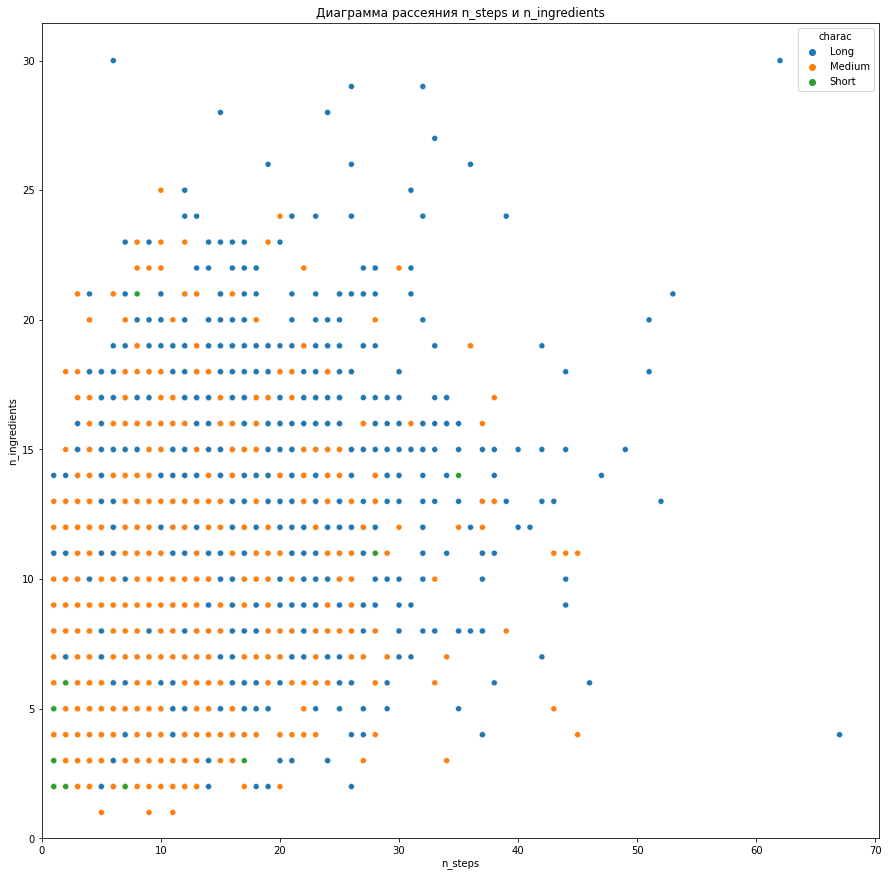

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue= 'charac', ax=ax)
ax.set_title("Диаграмма рассеяния n_steps и n_ingredients")
plt.ylim(0)
plt.xlim(0)
plt.show()

In [19]:
# Какой-либо сильной корреляции не наблюдается, разве что небольшая.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

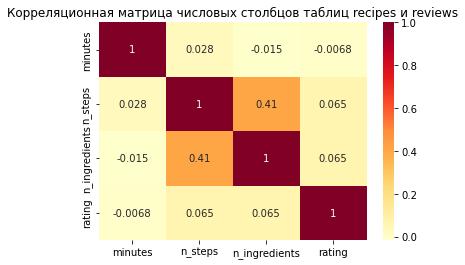

In [23]:
df = pd.concat([reviews, recipes], axis = 1)
corr_value = np.array([['corr_value'] * 4 for _ in range(4)])
dataplot = sns.heatmap(df[['minutes', 'n_steps', 'n_ingredients', 'rating']].corr(), cmap= 'YlOrRd', annot=True)
dataplot.set_title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")
plt.show()